# Flights Data Analysis

In [1]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Your numpy version: 1.23.5 (need at least 1.7.1)
Your SciPy version: 1.10.0 (need at least 0.12.0)
Your Pandas version:  1.5.3 (need at least 0.11.0)
Your Mapltolib version:  3.7.0 (need at least 1.2.1)
Your Scikit-Learn version:  1.2.1 (need at least 0.13.1)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
flights_df = pd.read_csv("../data/flights.csv")

In [4]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

#### Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
flights_df.isna().sum()

Unnamed: 0       0
year             0
month            0
day              0
dep_time      8255
dep_delay     8255
arr_time      8713
arr_delay     9430
carrier          0
tailnum       2512
flight           0
origin           0
dest             0
air_time      9430
distance         0
hour          8255
minute        8255
dtype: int64

In [7]:
# Your code here
flights_df.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [8]:
flights_to_sea = flights_df[flights_df.dest == "SEA"]
numToSea = flights_to_sea[flights_to_sea.year == 2013].shape[0]
numToSea

3923

In 2013, there were 3923 flights to Seattle (SEA) from NYC's 3 airports (EWR, LGA, and JFK)

(b) How many airlines fly from NYC to Seattle?

In [9]:
# Your code here
flights_to_sea.carrier.nunique()

5

There are 5 airlines that fly from NYC to Seattle

(c) How many unique air planes fly (number of flights) from NYC to Seattle?

In [10]:
# Your code here
flights_to_sea.tailnum.nunique()

935

There are 935 unique planes that fly from New York City to Seattle

(d) What is the average arrival delay for flights from NYC to Seattle?

In [11]:
# Your code here
flights_to_sea.arr_delay.mean()

-1.0990990990990992

The average arrival delay for flight from NYC to Seattle is -1.099 minutes, which means on average they arrive roughly one minute early than their scheduled arrival time.

(e) What proportion of flights to Seattle come from each NYC airport? Provide two ways of answering the question.

In [12]:
# Your code here. First way to answer the question
numFromEWR = flights_to_sea[flights_to_sea.origin == "EWR"].shape[0] 
numFromLGA = flights_to_sea[flights_to_sea.origin == "LGA"].shape[0]
numFromJFK = flights_to_sea[flights_to_sea.origin == "JFK"].shape[0]

propEWR = numFromEWR / numToSea
propLGA = numFromLGA / numToSea
propJFK = numFromJFK / numToSea

print(propEWR)
print(propLGA)
print(propJFK)

0.46673464185572267
0.0
0.5332653581442773


In [13]:
# Second way
airportCounts = flights_to_sea.origin.value_counts()
proportions = airportCounts / numToSea

print(proportions)

JFK    0.533265
EWR    0.466735
Name: origin, dtype: float64


No flights from LGA come to Seattle, while about 53% of flights come from JFK and roughly 46% come from EWR.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [14]:
# Your code here
flights_df["date"] = pd.to_datetime(flights_df[["year", "month", "day"]])
avgDelayByDate = flights_df.groupby("date")[["dep_delay", "arr_delay"]].mean()
maxDepDelayDate = avgDelayByDate.idxmax().dep_delay
maxArrDelayDate = avgDelayByDate.idxmax().arr_delay
print("Average highest departure delay was on: ", maxDepDelayDate)
print("Average highest arrival delay was on: ", maxArrDelayDate)

Average highest departure delay was on:  2013-03-08 00:00:00
Average highest arrival delay was on:  2013-03-08 00:00:00


The date with the highest average depature delay was March 8th, 2013 and the date with the highest arrival delay was also March 8th, 2013

(b) Focusing on the number of delayed flights in a day, what was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [15]:
flights_df.year.unique()

array([2013], dtype=int64)

In [16]:
# Your code here
delayedFlights = flights_df[flights_df.dep_delay > 0]
delayedPerDay = delayedFlights.groupby("date").size()
delayedPerDay.idxmax()

Timestamp('2013-12-23 00:00:00')

If you hate delayed flights, the worst day to fly out of NYC in 2013 is December 23rd, 2013.

(c) Are there any seasonal patterns in departure delays for flights from NYC (e.g., check monthly delay averages)?

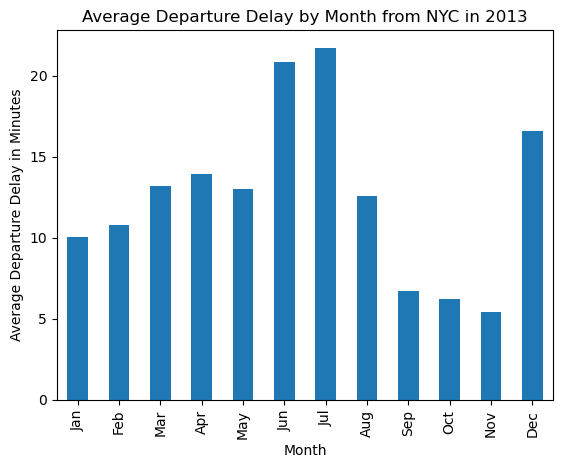

In [17]:
monthlyAvgDelay = flights_df.groupby("month")["dep_delay"].mean()
monthlyAvgDelay.plot(kind="bar")
plt.title("Average Departure Delay by Month from NYC in 2013")
plt.xlabel("Month")
plt.ylabel("Average Departure Delay in Minutes")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

According to the data, there is an increase in delays during June and July and a smaller spike in delays in December. The months with the lowest flight delays are September-November. There is also a miniscule peak during April.

(d) On average, how do departure delays vary over the course of a day (e.g., analyze by hour)?

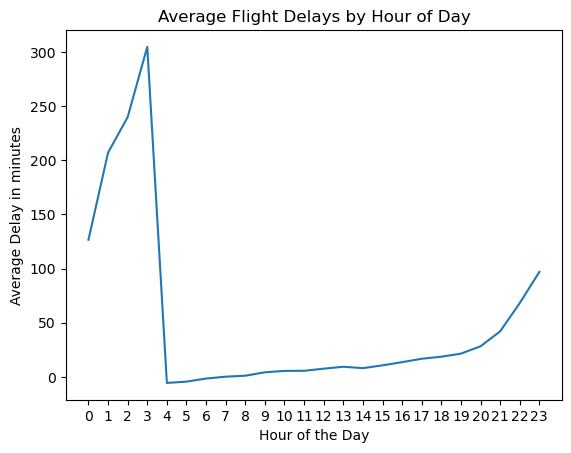

In [18]:
# Your code here
flights_df = flights_df.dropna(subset=["dep_time", "dep_delay"])
flights_df["dep_hour"] = (flights_df.dep_time // 100).astype(int) % 24
hourlyAvgDelay = flights_df.groupby("dep_hour")["dep_delay"].mean()
plt.plot(hourlyAvgDelay.index, hourlyAvgDelay)
plt.title("Average Flight Delays by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delay in minutes")
plt.xticks(range(24))
plt.show()

 According to the data the times of the day where delays are highest are between 12am and 3am. There is also a slight pick up in dealys from 7pm-12am too. 

## Question 3
    Which flight departing NYC in 2013 flew the fastest (e.g., calculate speed)?

In [19]:
# Your code here
flights_df["speed_mph"] = flights_df.distance / (flights_df.air_time / 60)
flights_df.loc[flights_df["speed_mph"].idxmax()]

Unnamed: 0                 216448
year                         2013
month                           5
day                            25
dep_time                   1709.0
dep_delay                     9.0
arr_time                   1923.0
arr_delay                   -14.0
carrier                        DL
tailnum                    N666DN
flight                       1499
origin                        LGA
dest                          ATL
air_time                     65.0
distance                      762
hour                         17.0
minute                        9.0
date          2013-05-25 00:00:00
dep_hour                       17
speed_mph              703.384615
Name: 216447, dtype: object

Flight N666DN departing LGA going to ATL on 2013-05-25 flew the fastest going 703 mph on average

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [20]:
# Your code here
dailyFlights = flights_df.groupby(["carrier", "flight", "dest"]).size()
dailyFlights[dailyFlights >= 365]

carrier  flight  dest
B6       1783    MCO     365
dtype: int64

There is only one flight that happends everyday which is a B6 flight 1783 which goes to MCO everyday

## Question 5
Develop one research question you can address using the NYCFlights13 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.

One research question I can develop is how departure delays vary across airlines and how airline activity affects the amount of delays they have.

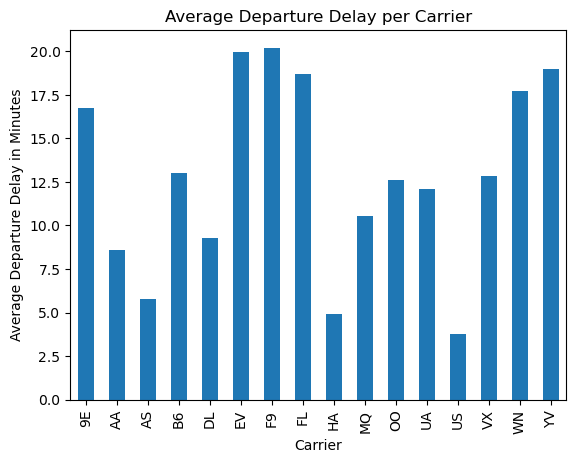

In [21]:
# First Visualization
avgDepDelayPerCarrier = flights_df.groupby("carrier")["dep_delay"].mean()
avgDepDelayPerCarrier.plot(kind="bar")
plt.title("Average Departure Delay per Carrier")
plt.xlabel("Carrier")
plt.ylabel("Average Departure Delay in Minutes")
plt.show()

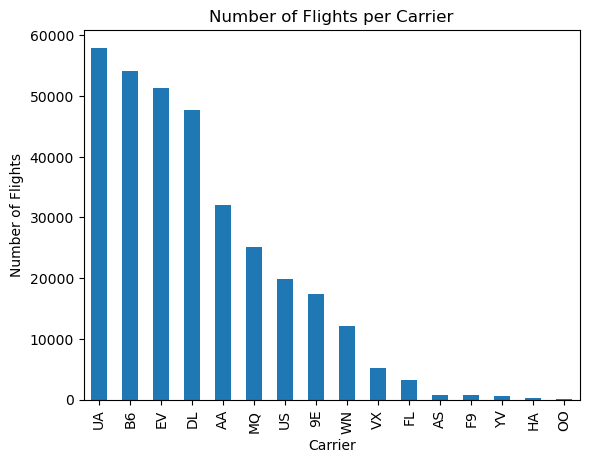

In [22]:
# Second Visualization
numFlightsPerCarrier = flights_df.carrier.value_counts()
numFlightsPerCarrier.plot(kind="bar")
plt.title("Number of Flights per Carrier")
plt.xlabel("Carrier")
plt.ylabel("Number of Flights")
plt.show()

I found that there doesn't seem to be much of a connection with airline activity and the amount of delays they experience. However, airlines like YV, HA, and OO have almost no activity but have a lot of delays. So, there is still room to research what really is causing the delays and how delays are connected to airline business/activity. Perhaps filtering it down to the day and looking at activity then.

## Question 6
What weather conditions (weather.csv) are associated with flight delays leaving NYC? Use graphics to explore and provide an explanation.

In [23]:
# Your code here
weather = pd.read_csv("../data/weather.csv")
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [24]:
merged_df = pd.merge(flights_df, weather, how = "inner", 
                     left_on = ["year", "month", "day", "hour", "origin"], 
                     right_on=["year", "month", "day", "hour", "origin"])

merged_df = merged_df.dropna(subset=['dep_delay', 'temp', 'humid', 'wind_speed', 'precip', 'pressure'])

model = smf.ols(formula= "dep_delay ~ temp + humid + wind_speed + precip + pressure", data=merged_df)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dep_delay   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     419.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:09:21   Log-Likelihood:            -5.2835e+05
No. Observations:              104173   AIC:                         1.057e+06
Df Residuals:                  104167   BIC:                         1.057e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    534.9630     17.468     30.626      0.000     500.727     569.200
temp           0.1315      0.007     19.756      0.000       0.118       0.145
humid         -0.1182      0.007    -18.050      0.000      -0.131      -0.105
wind_speed     0.0303      0.006      4.672      0.000       0.018       0.043
precip       100.1952      8.221     12.187      0.000      84.081     116.309
pressure      -0.5130      0.017    -30.199      0.000      -0.546      -0.480
==============================================================================
Omnibus:                    99300.796   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7285648.059
Skew:                           4.490   Prob(JB):                         0.00
Kurtosis:                      42.974   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

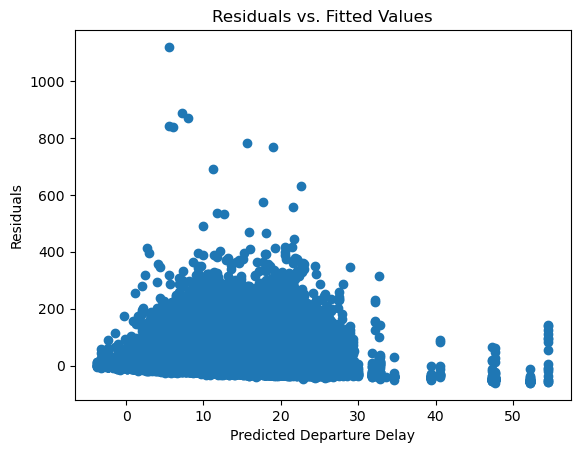

In [25]:
predicted_dep_delay = results.fittedvalues

residuals = merged_df.dep_delay - predicted_dep_delay

plt.scatter(predicted_dep_delay, residuals)

plt.xlabel("Predicted Departure Delay")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

Precipitation significantly increases flight departure delays from NYC, with a lesser impact from temperature and wind speed. Higher humidity and atmospheric pressure appear to slightly reduce delays. However, the R-squared values and significance results lower my confidence in this answer.